# EDA on Visa Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
visa = pd.read_csv("Visadataset.csv")

In [3]:
# first 5 rows
visa.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


## Profile Of Data

In [4]:
# number of rows
visa.shape
# obesrvation - There are total 25480 visa entries and 12 features 

(25480, 12)

In [5]:
# missing values
visa.info()
# observation - there is no missing value in any column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [6]:
# missing values
visa.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [7]:
# missing values
visa.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [8]:
# it also gives the datatype of every column and count of null values in each column
visa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [9]:
# categorical columns
cat_cols = [i for i in visa.columns if visa[i].dtype == 'O']
cat_cols

['case_id',
 'continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

In [10]:
# numerical cols
num_cols = [i for i in visa.columns if visa[i].dtype != 'O']
num_cols

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

In [11]:
# visa DF with categorical columns
visa_cat = visa[cat_cols]
visa_cat.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,region_of_employment,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,West,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,Northeast,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,West,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,West,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,South,Year,Y,Certified


In [12]:
# visa DF with numerical columns
visa_num = visa[num_cols]
visa_num.head()

,no_of_employees,yr_of_estab,prevailing_wage
0,14513,2007,592.2029
1,2412,2002,83425.6500
2,44444,2008,122996.8600
3,98,1897,83434.0300
4,1082,2005,149907.3900


In [13]:
# memory utilization of dataframe
visa.memory_usage()

Index                       128
case_id                  203840
continent                203840
education_of_employee    203840
has_job_experience       203840
requires_job_training    203840
no_of_employees          203840
yr_of_estab              203840
region_of_employment     203840
prevailing_wage          203840
unit_of_wage             203840
full_time_position       203840
case_status              203840
dtype: int64

## Statistical Analysis

In [14]:
# variance of numerical columns in visa dataFrame
visa_num.var()
# observation - number of employees are vary greatly from each other and year of establishment vary minimum

no_of_employees    5.233996e+08
yr_of_estab        1.794957e+03
prevailing_wage    2.789524e+09
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='no_of_employees', ylabel='Density'>

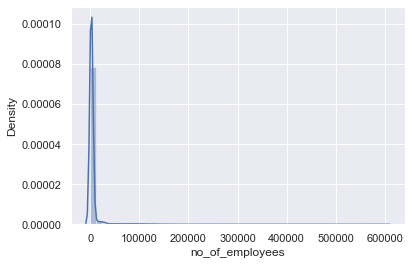

In [15]:
sns.distplot(visa['no_of_employees'])
# right skewed

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yr_of_estab', ylabel='Density'>

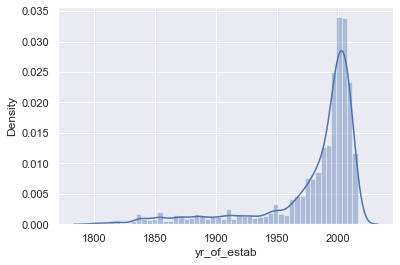

In [16]:
sns.distplot(visa['yr_of_estab'])
# left skewed

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='prevailing_wage', ylabel='Density'>

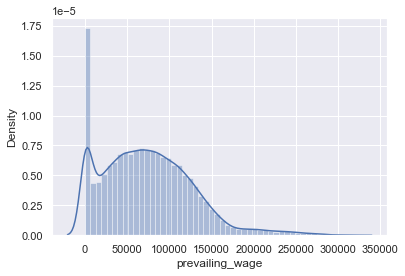

In [17]:
sns.distplot(visa['prevailing_wage'])
# right skewed

In [18]:
# correlation between different features in visa dataset (only applied on numerical) (perasons )
visa.corr(method= 'spearman')

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.006214,-0.015197
yr_of_estab,-0.006214,1.000000,0.019566
prevailing_wage,-0.015197,0.019566,1.000000


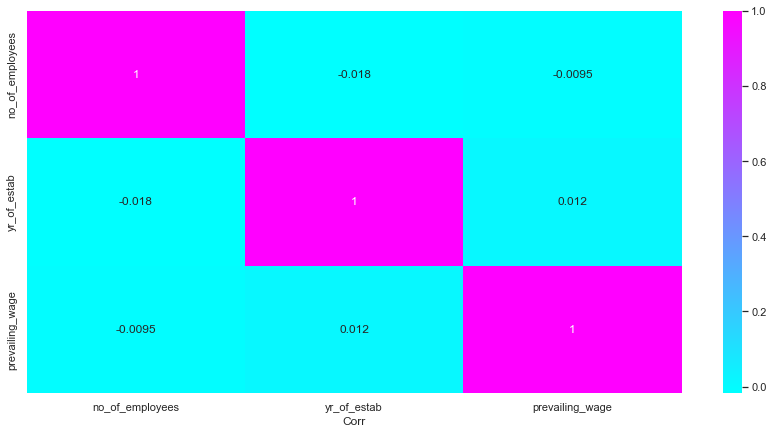

In [19]:
# heatmap for showing correlation

figure = plt.figure(figsize=(12, 6))
sns.heatmap(visa.corr(), annot=True,cmap=plt.cm.cool)
plt.tight_layout()
plt.xlabel('Corr')
plt.show()

In [20]:
# standard deviation of 
visa_num.std()
# it shows the spread of the data

no_of_employees    22877.928848
yr_of_estab           42.366929
prevailing_wage    52815.942327
dtype: float64

In [21]:
# describe method for showing basic statistics on numerical data
visa_num.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [22]:
# describe method for showing basic statistics on categorical data
visa_cat.describe()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,region_of_employment,unit_of_wage,full_time_position,case_status
count,25480,25480,25480,25480,25480,25480,25480,25480,25480
unique,25480,6,4,2,2,5,4,2,2
top,EZYV01,Asia,Bachelor's,Y,N,Northeast,Year,Y,Certified
freq,1,16861,10234,14802,22525,7195,22962,22773,17018


## Graph based analysis

### 1. Univariate analysis

In [23]:
visa_num.head()

,no_of_employees,yr_of_estab,prevailing_wage
0,14513,2007,592.2029
1,2412,2002,83425.6500
2,44444,2008,122996.8600
3,98,1897,83434.0300
4,1082,2005,149907.3900


In [24]:
visa.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


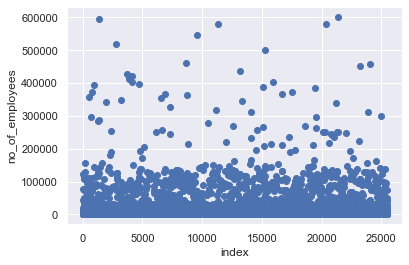

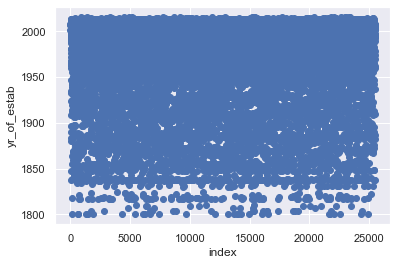

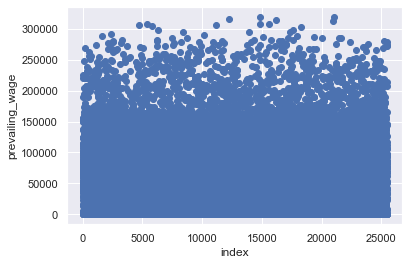

In [25]:
for i in visa_num.columns:
    plt.scatter(visa.index, visa[i])
    plt.xlabel("index")
    plt.ylabel(i)
    plt.show()

<AxesSubplot:ylabel='no_of_employees'>

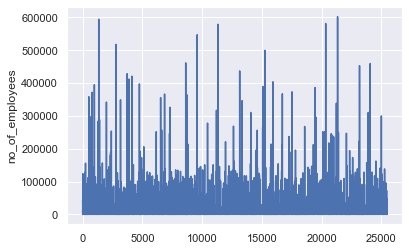

In [26]:
# line chart
sns.lineplot(x=visa.index, y = visa_num.no_of_employees)
# observation - It is showing that Most of the people are working with less than 200000 employees (same observation can be made
# with scatter plot as well)

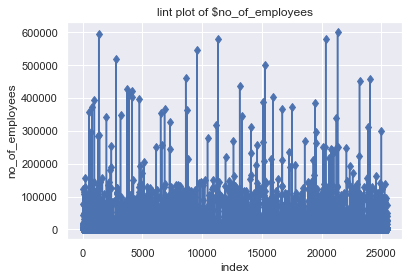

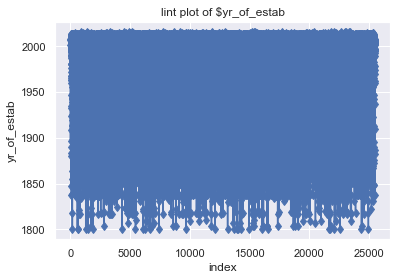

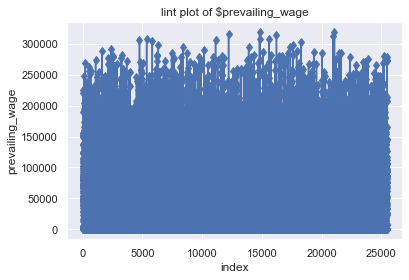

In [27]:
# line chart (same observation which we get from scatter plot)
for col in visa_num.columns:
    plt.title(f"lint plot of ${col}")
    plt.plot(visa_num.index, visa_num[col], marker='d')
    plt.xlabel("index")
    plt.ylabel(col)
    plt.show()

<AxesSubplot:xlabel='case_status', ylabel='no_of_employees'>

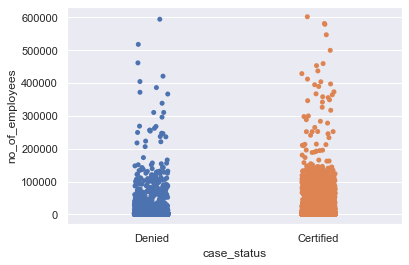

In [28]:
# stripplot helps in visualizing the distribution of numerical data points and categories
# swarmplot can also be used
sns.stripplot(x = visa.case_status, y = visa_num.no_of_employees)

<AxesSubplot:xlabel='case_status', ylabel='yr_of_estab'>

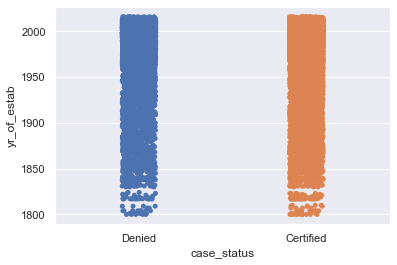

In [29]:
sns.stripplot(x = visa.case_status, y = visa_num.yr_of_estab)

<AxesSubplot:xlabel='case_status', ylabel='prevailing_wage'>

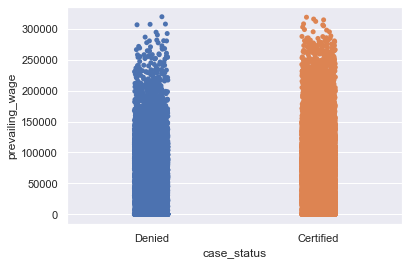

In [30]:
sns.stripplot(x = visa.case_status, y = visa_num.prevailing_wage)

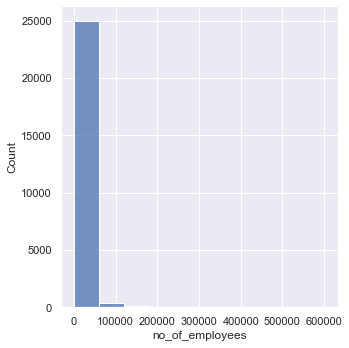

In [31]:
# Histogram is similar to barplot used to plot frequency of data
sns.displot(visa_num.no_of_employees, kde=False, bins=10)
# observation - Most of employees lie in range 0 to 100000

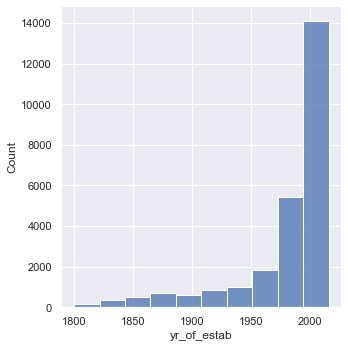

In [32]:
sns.displot(visa_num.yr_of_estab, kde=False, bins=10)
# observation - Year of establishment of most of the companies 1975 to 2000

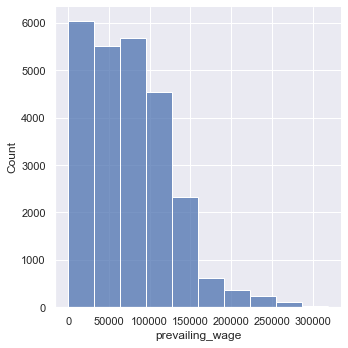

In [33]:
sns.displot(visa_num.prevailing_wage, kde=False, bins=10)
# observation - Most of the people have wages between 0 to 150000 very less people earns 300000

<AxesSubplot:xlabel='no_of_employees', ylabel='Density'>

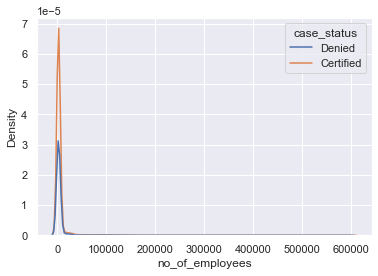

In [34]:
# kdeplot is the probability density function of variable (we can make this or histogram both will give same observation)
sns.kdeplot(x = "no_of_employees", data = visa, hue="case_status")# It is best used when we want to compare with different categories

<AxesSubplot:xlabel='prevailing_wage', ylabel='Density'>

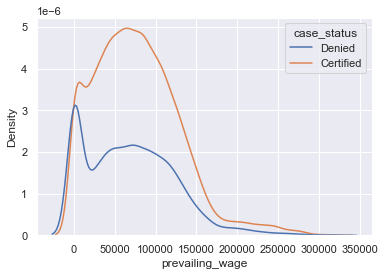

In [35]:
sns.kdeplot(x = "prevailing_wage", data = visa, hue="case_status")# It is best used when we want to compare with different categories

<AxesSubplot:xlabel='yr_of_estab', ylabel='Density'>

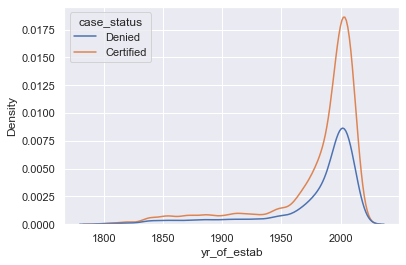

In [36]:
sns.kdeplot(x = "yr_of_estab", data = visa, hue="case_status")# It is best used when we want to compare with different categories

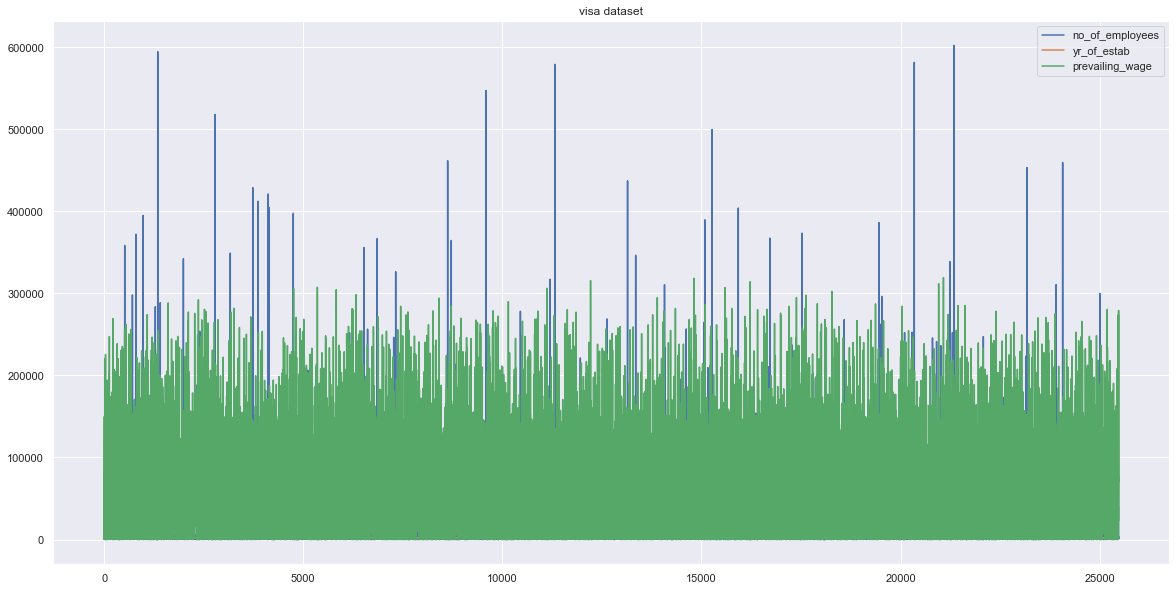

In [37]:
# line plot of all numerical features in one graph but is difficult for us to distinguish
visa_num.plot(figsize=(20,10), title = "visa dataset")
plt.show()

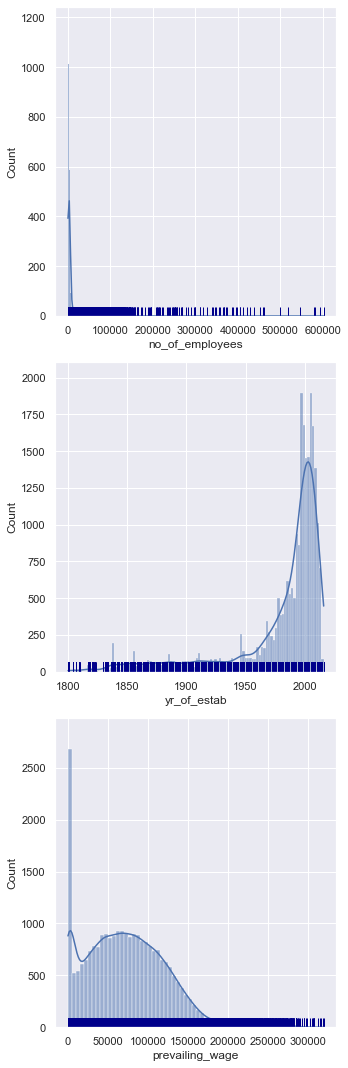

In [38]:
# Rug plot Ticks on the x axis showing position of indiviual data point (not meaning of height)(can also be used to see outliers)

rows = 3
cols = 1
fig = plt.figure( figsize=(cols*5, rows*5))

for i, col in enumerate(visa_num.columns):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.histplot(x=col, data=visa, kde=True)
    sns.rugplot(x=col, data=visa, height=.03, color='darkblue')
fig.tight_layout()  
plt.show()

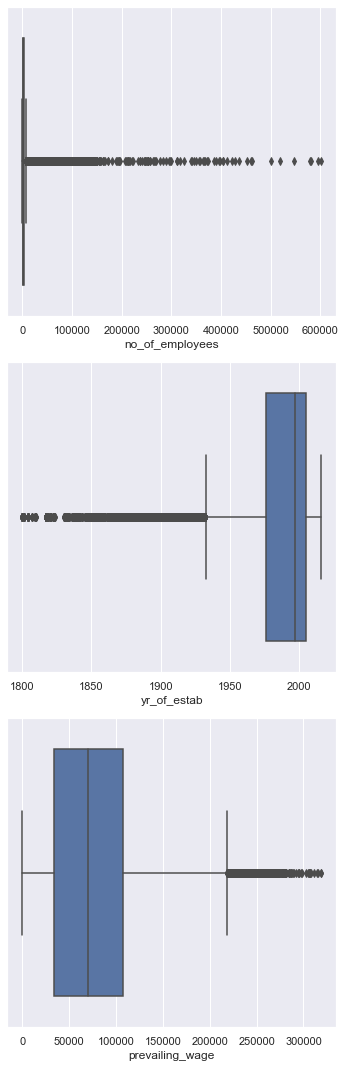

In [39]:
# Box plot - Used to see the 5 number summary and observe outliers
rows = 3
cols = 1
fig = plt.figure( figsize=(cols*5, rows*5))

for i, col in enumerate(visa_num.columns):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.boxplot(x = col, data=visa)
fig.tight_layout()  
plt.show()

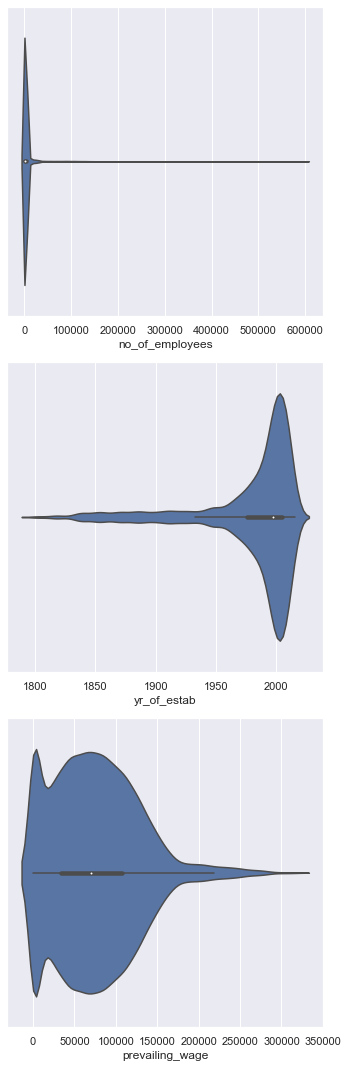

In [40]:
# violin plot is the combination of boxplot and kernal density plot
rows = 3
cols = 1
fig = plt.figure( figsize=(cols*5, rows*5))

for i, col in enumerate(visa_num.columns):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.violinplot(x = col, data = visa)
fig.tight_layout()  
plt.show()

### categorical features

In [45]:
visa_cat.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,region_of_employment,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,West,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,Northeast,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,West,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,West,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,South,Year,Y,Certified


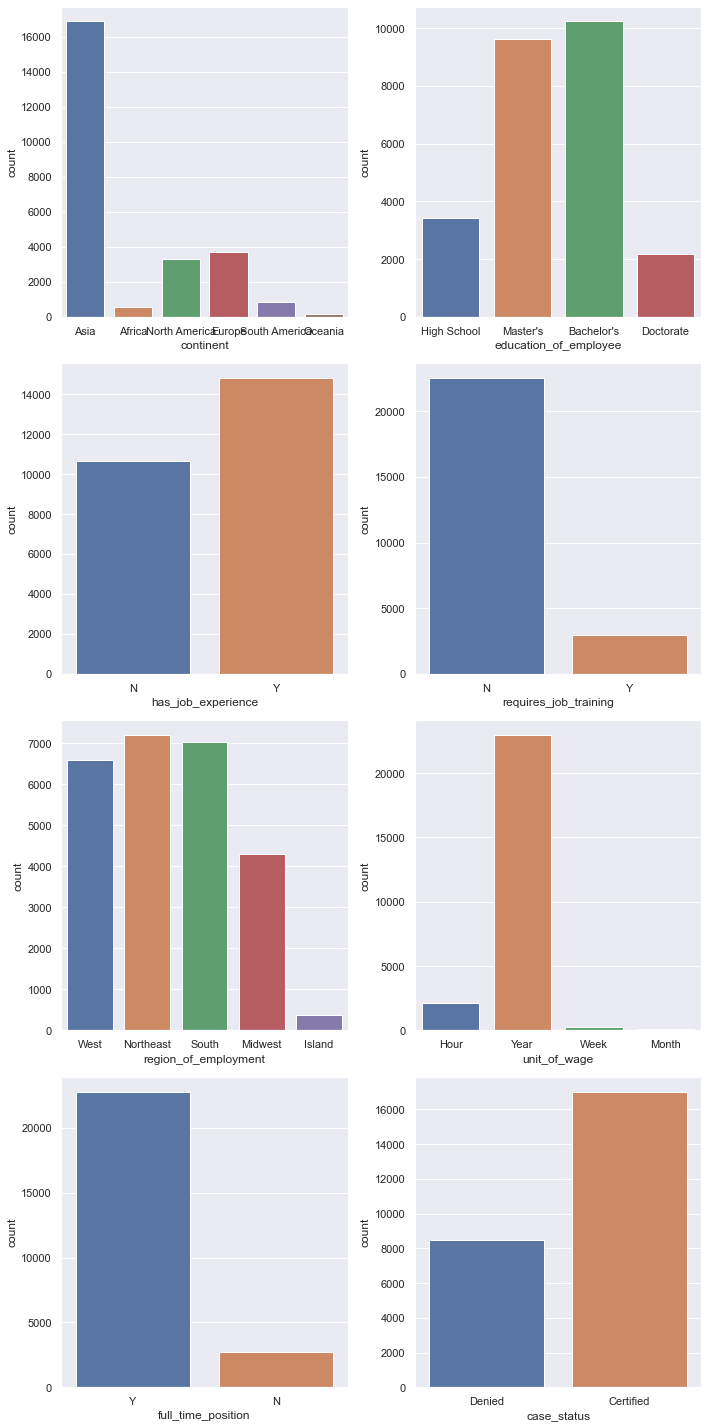

In [49]:
# count chart - It compares different classes of the same feature how many times it occur

rows = 4
cols = 2
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(visa_cat.columns[1:]):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.countplot(x = col, data=visa_cat)
fig.tight_layout()  
plt.show()

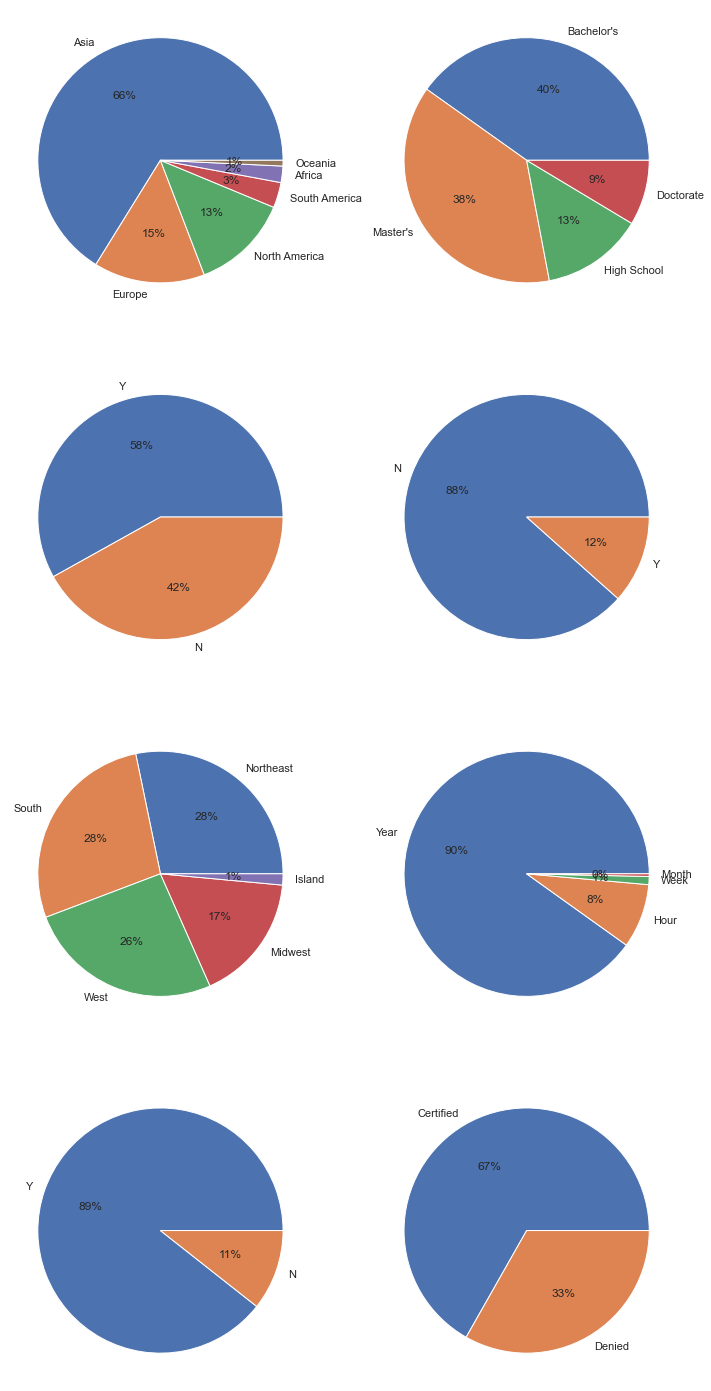

In [60]:
# Pie chart - It displays the percentage distribution of a categorical feature (Not good for plotting more than 4 features)

rows = 4
cols = 2
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(visa_cat.columns[1:]):
    ax=fig.add_subplot(rows,cols,i+1)
    df = visa_cat[col].value_counts()
    plt.pie(df, labels=df.index, autopct="%.0f%%")
fig.tight_layout()
plt.show()

## Bivariate Analysis and multivariate analysis

In [61]:
visa_num.head()

,no_of_employees,yr_of_estab,prevailing_wage
0,14513,2007,592.2029
1,2412,2002,83425.6500
2,44444,2008,122996.8600
3,98,1897,83434.0300
4,1082,2005,149907.3900


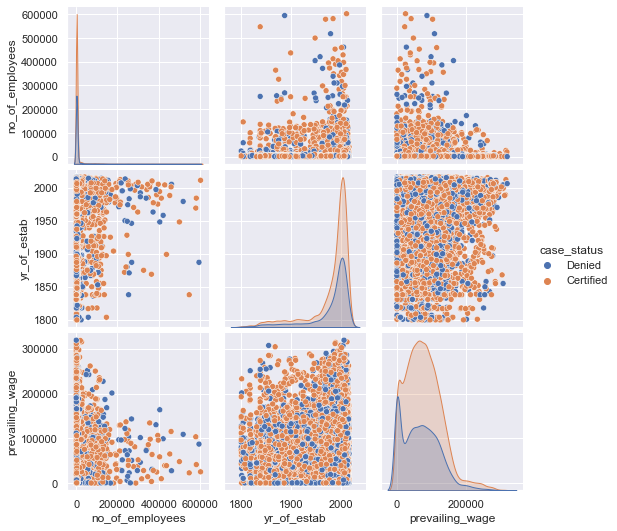

In [67]:
# pair plot

sns.pairplot(visa, hue="case_status")

In [72]:
# stacked bar plots - very useful when plotting nominal categorical feature or small ordinal categorical features

<AxesSubplot:>

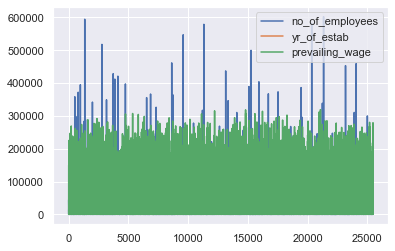

In [73]:
# stacked line plot 


visa_num.plot.line()

In [ ]:
# Some more bivariate plot types - 
# Scatter plots
# Hex plots
# Stacked bar charts and area charts
# Bivariate line charts